In [1]:
# import the necessary library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
import textwrap
%matplotlib inline

In [2]:
df = pd.read_excel("Questionnaire response 4 analysis.xlsx")
df.head()

ID          Start time     Completion time      Email  Name  \
0   1 2024-04-15 19:02:53 2024-04-15 20:25:54  anonymous   NaN   
1   2 2024-04-18 19:57:07 2024-04-18 20:06:36  anonymous   NaN   
2   3 2024-04-25 19:39:53 2024-04-25 19:45:50  anonymous   NaN   
3   4 2024-04-26 15:46:03 2024-04-26 15:46:46  anonymous   NaN   
4   5 2024-04-26 15:39:41 2024-04-26 15:47:56  anonymous   NaN   

   Last modified time       Age             Gender Level of Education  \
0                 NaN  60 above  Prefer not to say           Graduate   
1                 NaN     45-60               Male           Graduate   
2                 NaN     45-60               Male           Graduate   
3                 NaN     15-25             Female      Undergraduate   
4                 NaN     15-25             Female      Undergraduate   

    Job Category  ...  \
0        Teacher  ...   
1  Administrator  ...   
2        Teacher  ...   
3        Student  ...   
4        Student  ...   

  What types of messages do you consider to be potential phishing attempts? (Select all that apply)  \
0  Emails containing suspicious links or attachme...                                                  
1  Emails asking for personal information such as...                                                  
2  Emails asking for personal information such as...                                                  
3  Emails containing suspicious links or attachme...                                                  
4  Emails asking for personal information such as...                                                  

  How often do you check the sender's email address or URL to verify the legitimacy of an email or message before clicking on links or providing personal information?  \
0                                             Always                                                                                                                     
1                                         Very often                                                                                                                     
2                                          Sometimes                                                                                                                     
3                                             Always                                                                                                                     
4                                             Always                                                                                                                     

  Have you ever fallen victim to a phishing scam or had your personal information compromised as a result of a phishing attack?  \
0                             Prefer not to disclose                                                                              
1                                                Yes                                                                              
2                                                Yes                                                                              
3                                                 No                                                                              
4                                                Yes                                                                              

  Which of the following actions would you take if you received a suspicious email or message that you suspect may be a phishing attempt? (Select all that apply)  \
0  Do not click on any links or download any atta...                                                                                                                
1  Delete the email or message immediately;Do not...                                                                                                                
2  Do not click on any links or download any atta...                                          

In [3]:
df["Susceptibility"].value_counts(normalize=True)

Susceptibility
1    0.552764
0    0.447236
Name: proportion, dtype: float64

In [4]:
df["Susceptibility"] = df["Susceptibility"].map({1:0, 0:1})

# Exploratory Data Analysis

In [5]:
from ydata_profiling import ProfileReport

In [6]:
profile = ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

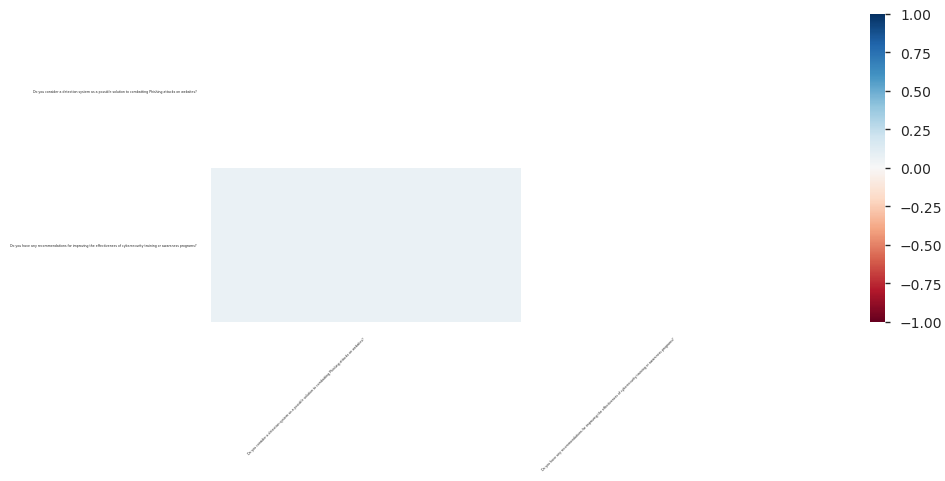

In [7]:
profile.to_notebook_iframe()

### What types of messages do you consider to be potential phishing attempts? (Select all that apply)	

In [8]:
df.iloc[:, -10] = df.iloc[:, -10].apply(lambda x:x.split(";"))
items = list((Counter(sum(df.iloc[:, -10], [])).items()))
items.remove(('', 199))

series = pd.Series(dict(items))
series.index = series.index.map(lambda x: textwrap.fill(x, len(x)/2))

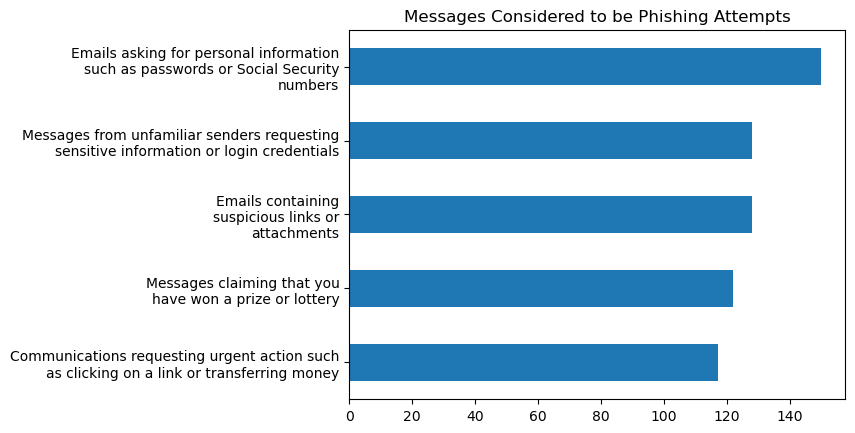

In [9]:
series.sort_values().plot.barh(title="Messages Considered to be Phishing Attempts")
plt.show()

In [10]:
df.iloc[:, -7] = df.iloc[:, -7].apply(lambda x: x.split(";"))
items = list((Counter(sum(df.iloc[:, -7], [])).items()))
items.remove(('', 199))


series = pd.Series(dict(items))
series.index = series.index.map(lambda x: textwrap.fill(x, len(x)/2))

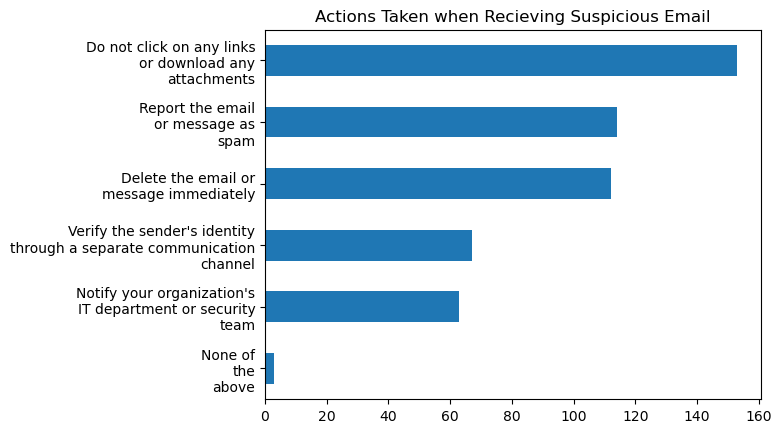

In [11]:
series.sort_values().plot.barh(title="Actions Taken when Recieving Suspicious Email");

## Analysis

In [12]:
df.head()

ID          Start time     Completion time      Email  Name  \
0   1 2024-04-15 19:02:53 2024-04-15 20:25:54  anonymous   NaN   
1   2 2024-04-18 19:57:07 2024-04-18 20:06:36  anonymous   NaN   
2   3 2024-04-25 19:39:53 2024-04-25 19:45:50  anonymous   NaN   
3   4 2024-04-26 15:46:03 2024-04-26 15:46:46  anonymous   NaN   
4   5 2024-04-26 15:39:41 2024-04-26 15:47:56  anonymous   NaN   

   Last modified time       Age             Gender Level of Education  \
0                 NaN  60 above  Prefer not to say           Graduate   
1                 NaN     45-60               Male           Graduate   
2                 NaN     45-60               Male           Graduate   
3                 NaN     15-25             Female      Undergraduate   
4                 NaN     15-25             Female      Undergraduate   

    Job Category  ...  \
0        Teacher  ...   
1  Administrator  ...   
2        Teacher  ...   
3        Student  ...   
4        Student  ...   

  What types of messages do you consider to be potential phishing attempts? (Select all that apply)  \
0  [Emails containing suspicious links or attachm...                                                  
1  [Emails asking for personal information such a...                                                  
2  [Emails asking for personal information such a...                                                  
3  [Emails containing suspicious links or attachm...                                                  
4  [Emails asking for personal information such a...                                                  

  How often do you check the sender's email address or URL to verify the legitimacy of an email or message before clicking on links or providing personal information?  \
0                                             Always                                                                                                                     
1                                         Very often                                                                                                                     
2                                          Sometimes                                                                                                                     
3                                             Always                                                                                                                     
4                                             Always                                                                                                                     

  Have you ever fallen victim to a phishing scam or had your personal information compromised as a result of a phishing attack?  \
0                             Prefer not to disclose                                                                              
1                                                Yes                                                                              
2                                                Yes                                                                              
3                                                 No                                                                              
4                                                Yes                                                                              

  Which of the following actions would you take if you received a suspicious email or message that you suspect may be a phishing attempt? (Select all that apply)  \
0  [Do not click on any links or download any att...                                                                                                                
1  [Delete the email or message immediately, Do n...                                                                                                                
2  [Do not click on any links or download any att...                                          

### Age and Sucessitible

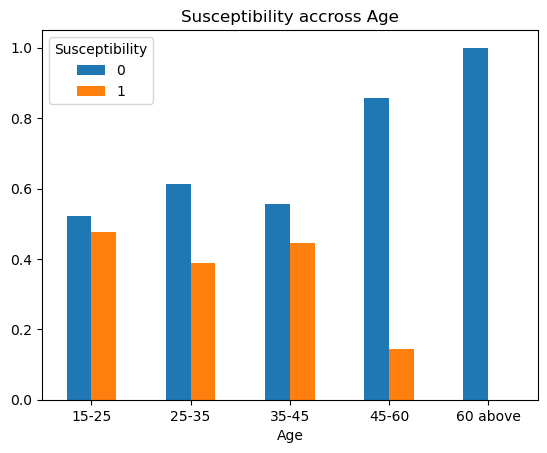

In [13]:
pd.crosstab(df["Age"], df["Susceptibility"]).apply(lambda x: x/x.sum(), axis=1).plot.bar()
plt.xticks(rotation=0)
plt.title("Susceptibility accross Age");

### Gender and Susceptibility

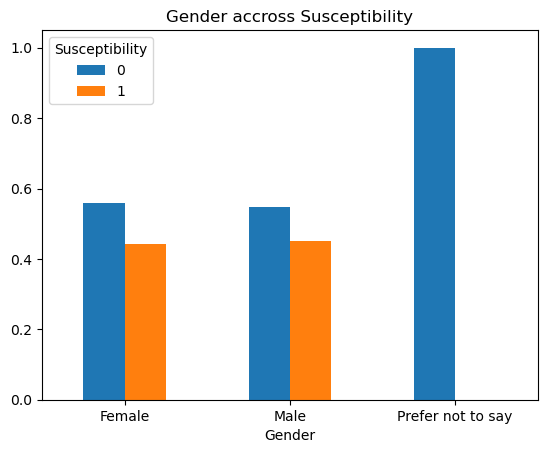

In [14]:
pd.crosstab(df["Gender"], df["Susceptibility"]).apply(lambda x: x/x.sum(), axis=1).plot.bar()
plt.xticks(rotation=0)
plt.title("Gender accross Susceptibility");

### Job Category and Susceptibility

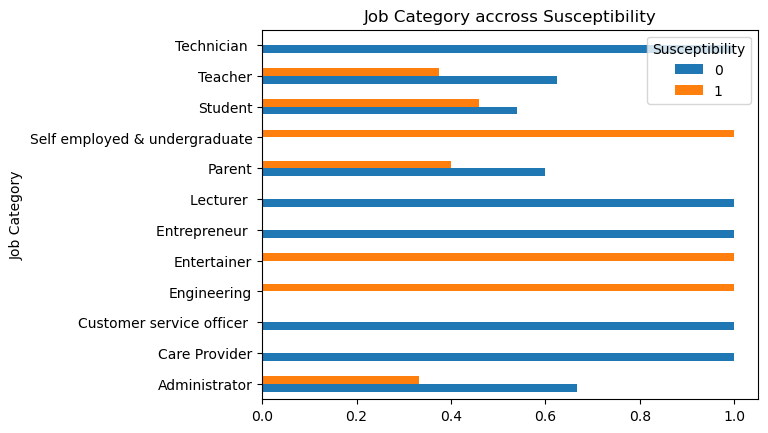

In [15]:
pd.crosstab(df["Job Category"], df["Susceptibility"]).apply(lambda x: x/x.sum(), axis=1).plot.barh()
plt.xticks(rotation=0)
plt.title("Job Category accross Susceptibility");

In [16]:
df.head()

ID          Start time     Completion time      Email  Name  \
0   1 2024-04-15 19:02:53 2024-04-15 20:25:54  anonymous   NaN   
1   2 2024-04-18 19:57:07 2024-04-18 20:06:36  anonymous   NaN   
2   3 2024-04-25 19:39:53 2024-04-25 19:45:50  anonymous   NaN   
3   4 2024-04-26 15:46:03 2024-04-26 15:46:46  anonymous   NaN   
4   5 2024-04-26 15:39:41 2024-04-26 15:47:56  anonymous   NaN   

   Last modified time       Age             Gender Level of Education  \
0                 NaN  60 above  Prefer not to say           Graduate   
1                 NaN     45-60               Male           Graduate   
2                 NaN     45-60               Male           Graduate   
3                 NaN     15-25             Female      Undergraduate   
4                 NaN     15-25             Female      Undergraduate   

    Job Category  ...  \
0        Teacher  ...   
1  Administrator  ...   
2        Teacher  ...   
3        Student  ...   
4        Student  ...   

  What types of messages do you consider to be potential phishing attempts? (Select all that apply)  \
0  [Emails containing suspicious links or attachm...                                                  
1  [Emails asking for personal information such a...                                                  
2  [Emails asking for personal information such a...                                                  
3  [Emails containing suspicious links or attachm...                                                  
4  [Emails asking for personal information such a...                                                  

  How often do you check the sender's email address or URL to verify the legitimacy of an email or message before clicking on links or providing personal information?  \
0                                             Always                                                                                                                     
1                                         Very often                                                                                                                     
2                                          Sometimes                                                                                                                     
3                                             Always                                                                                                                     
4                                             Always                                                                                                                     

  Have you ever fallen victim to a phishing scam or had your personal information compromised as a result of a phishing attack?  \
0                             Prefer not to disclose                                                                              
1                                                Yes                                                                              
2                                                Yes                                                                              
3                                                 No                                                                              
4                                                Yes                                                                              

  Which of the following actions would you take if you received a suspicious email or message that you suspect may be a phishing attempt? (Select all that apply)  \
0  [Do not click on any links or download any att...                                                                                                                
1  [Delete the email or message immediately, Do n...                                                                                                                
2  [Do not click on any links or download any att...                                          

### How often do you check the sender's email address or URL to verify the legitimacy of an email or message before clicking on links or providing personal information?	 VS Susceptibility

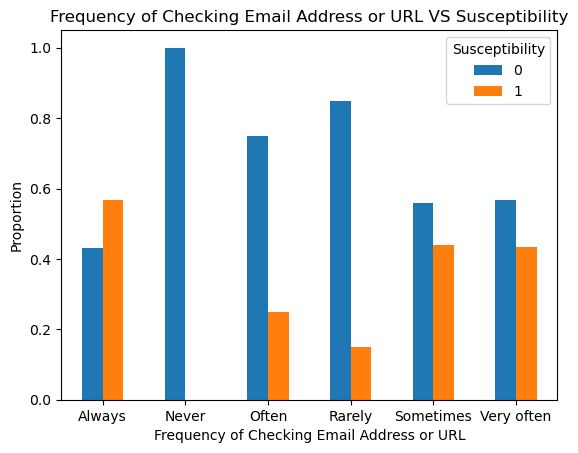

In [17]:
pd.crosstab(df.iloc[:, 29], df["Susceptibility"]).apply(lambda x: x/x.sum(), axis=1).plot.bar()
plt.xticks(rotation=0)
plt.xlabel("Frequency of Checking Email Address or URL")
plt.ylabel("Proportion")
plt.title("Frequency of Checking Email Address or URL VS Susceptibility");

### How confident are you in identifying phishing attempts? and Susceptibility

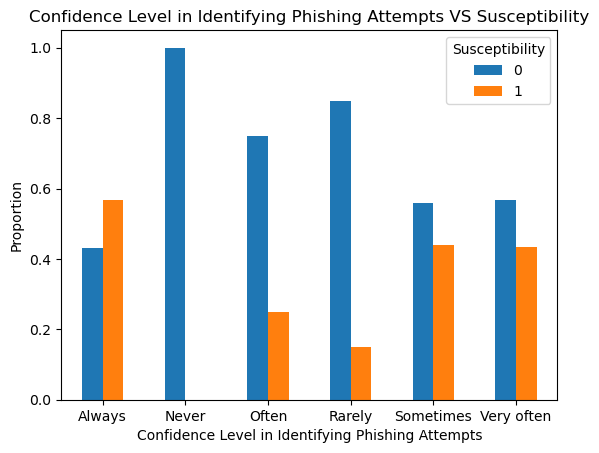

In [18]:
pd.crosstab(df.iloc[:, 29], df["Susceptibility"]).apply(lambda x: x/x.sum(), axis=1).plot.bar()
plt.xticks(rotation=0)
plt.xlabel("Confidence Level in Identifying Phishing Attempts")
plt.ylabel("Proportion")
plt.title("Confidence Level in Identifying Phishing Attempts VS Susceptibility");

### How often do you receive cybersecurity awareness training or education in your academic or professional environment? VS Susceptibility

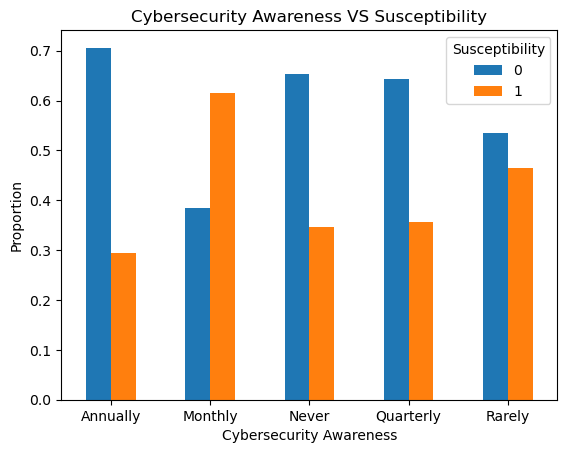

In [19]:
pd.crosstab(df.iloc[:, 32], df["Susceptibility"]).apply(lambda x: x/x.sum(), axis=1).plot.bar()
plt.xticks(rotation=0)
plt.xlabel("Cybersecurity Awareness")
plt.ylabel("Proportion")
plt.title("Cybersecurity Awareness VS Susceptibility");

### Conscientiousness VS Susceptibility

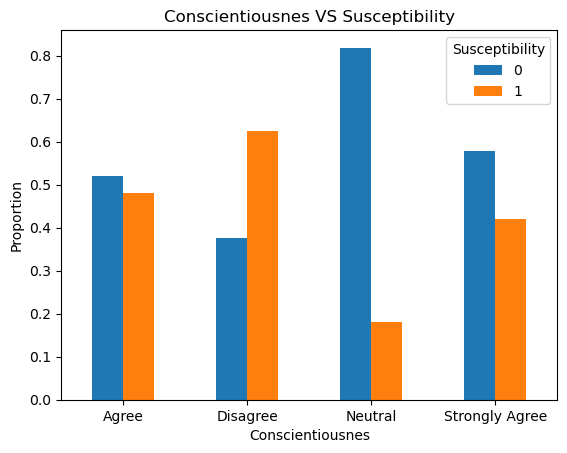

In [20]:
pd.crosstab(df.iloc[:, 12], df["Susceptibility"]).apply(lambda x: x/x.sum(), axis=1).plot.bar()
plt.xticks(rotation=0)
plt.xlabel("Conscientiousnes")
plt.ylabel("Proportion")
plt.title("Conscientiousnes VS Susceptibility");

## Extraversion and Susceptibility

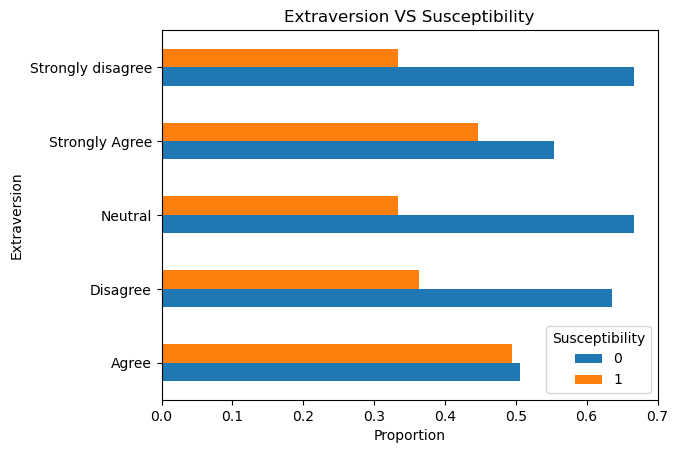

In [21]:
pd.crosstab(df.iloc[:, 13], df["Susceptibility"]).apply(lambda x: x/x.sum(), axis=1).plot.barh()
plt.xticks(rotation=0)
plt.ylabel("Extraversion")
plt.xlabel("Proportion")
plt.title("Extraversion VS Susceptibility");

## Neuroticism VS Susceptibility

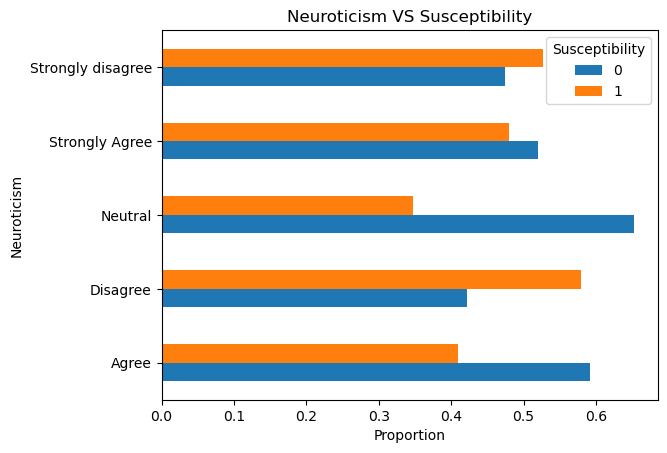

In [22]:
pd.crosstab(df.iloc[:, 15], df["Susceptibility"]).apply(lambda x: x/x.sum(), axis=1).plot.barh()
plt.xticks(rotation=0)
plt.ylabel("Neuroticism")
plt.xlabel("Proportion")
plt.title("Neuroticism VS Susceptibility");

### Openness VS Susceptibility

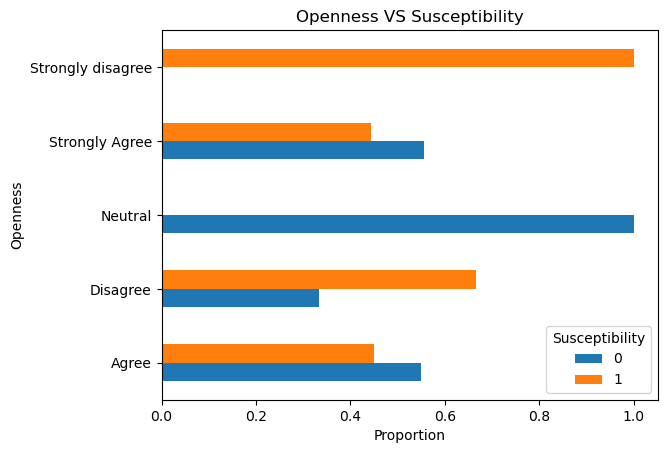

In [23]:
pd.crosstab(df.iloc[:, 11], df["Susceptibility"]).apply(lambda x: x/x.sum(), axis=1).plot.barh()
plt.xticks(rotation=0)
plt.ylabel("Openness")
plt.xlabel("Proportion")
plt.title("Openness VS Susceptibility");

## Modelling Part

In [24]:
# gender
df["Gender"] = df["Gender"].map({"Prefer not to say":0, "Male":1, "Female":2})

In [25]:
df["Income range"] = df["Income range"].map({"20k - 50k":0, "50k - 100k":1, "100k - 200k":2, "200k above":3})

In [26]:
df.columns = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31", "32", "33", "34", "35", "36", "37"]


In [27]:
df["11"] = df["11"].map({"Strongly disagree":0, "Disagree":1, "Neutral":2, "Agree":3, "Strongly Agree":4})

In [28]:
df["12"] = df["12"].map({"Disagree":0, "Neutral":1, "Agree":2, "Strongly Agree":3})

In [29]:
df["13"] = df["13"].map({"Strongly disagree":0, "Disagree":1, "Neutral":2, "Agree":3, "Strongly Agree":4})

In [30]:
df["14"] = df["14"].map({"Strongly disagree":0, "Disagree":1, "Neutral":2, "Agree":3, "Strongly Agree":4})

In [31]:
df["15"] = df["15"].map({"Strongly disagree":0, "Disagree":1, "Neutral":2, "Agree":3, "Strongly Agree":4})

In [32]:
df['16'] = df["16"].map({"Daily":0, "Weekly":1, "Monthly":2})

In [33]:
df.head()

0                   1                   2          3   4   5         6  7  \
0  1 2024-04-15 19:02:53 2024-04-15 20:25:54  anonymous NaN NaN  60 above  0   
1  2 2024-04-18 19:57:07 2024-04-18 20:06:36  anonymous NaN NaN     45-60  1   
2  3 2024-04-25 19:39:53 2024-04-25 19:45:50  anonymous NaN NaN     45-60  1   
3  4 2024-04-26 15:46:03 2024-04-26 15:46:46  anonymous NaN NaN     15-25  2   
4  5 2024-04-26 15:39:41 2024-04-26 15:47:56  anonymous NaN NaN     15-25  2   

               8              9  ...  \
0       Graduate        Teacher  ...   
1       Graduate  Administrator  ...   
2       Graduate        Teacher  ...   
3  Undergraduate        Student  ...   
4  Undergraduate        Student  ...   

                                                  28          29  \
0  [Emails containing suspicious links or attachm...      Always   
1  [Emails asking for personal information such a...  Very often   
2  [Emails asking for personal information such a...   Sometimes   
3  [Emails containing suspicious links or attachm...      Always   
4  [Emails asking for personal information such a...      Always   

                       30                                                 31  \
0  Prefer not to disclose  [Do not click on any links or download any att...   
1                     Yes  [Delete the email or message immediately, Do n...   
2                     Yes  [Do not click on any links or download any att...   
3                      No  [Delete the email or message immediately, Do n...   
4                     Yes  [Delete the email or message immediately, Do n...   

       32                            33     34              35  \
0  Rarely  Simulated phishing exercises  Maybe             NaN   
1   Never                Online courses    Yes             NaN   
2  Rarely                Online courses    Yes  Strongly agree   
3  Rarely                     Workshops    Yes  Strongly agree   
4  Rarely                Online courses     No  Strongly agree   

                                           36 37  
0                                         NaN  0  
1  Yes dere should be a consistent awareness   0  
2                                         NaN  0  
3                                         NaN  1  
4                                          No  0  

[5 rows x 38 columns]

In [34]:
df["17"] = df["17"].map({"Daily":0, "Weekly":1, "Monthly":2, "Yearly":3, "Seasonal":4, "Never":-1})

In [35]:
df["18"] = df["18"].map({"Daily":0, "Weekly":1, "Monthly":2, "Yearly":3, "Seasonal":4, "Never":-1})

In [36]:
df["19"] = df["19"].map({"Daily":0, "Weekly":1, "Monthly":2, "Yearly":3, "Seasonal":4, "Never":-1})

In [37]:
df["20"] = df["20"].map({"Daily":0, "Weekly":1, "Monthly":2, "Seasonal":3, "Never":-1})

In [38]:
df["21"] = df["21"].map({"Daily":0, "Weekly":1, "Monthly":2, "Yearly":3, "Seasonal":4, "Never":-1})

In [39]:
df["22"] = df["22"].map({"Strongly disagree":0, "Disagree":1, "Neutral":2, "Agree":3, "Strongly Agree":4})

In [40]:
df.head()

0                   1                   2          3   4   5         6  7  \
0  1 2024-04-15 19:02:53 2024-04-15 20:25:54  anonymous NaN NaN  60 above  0   
1  2 2024-04-18 19:57:07 2024-04-18 20:06:36  anonymous NaN NaN     45-60  1   
2  3 2024-04-25 19:39:53 2024-04-25 19:45:50  anonymous NaN NaN     45-60  1   
3  4 2024-04-26 15:46:03 2024-04-26 15:46:46  anonymous NaN NaN     15-25  2   
4  5 2024-04-26 15:39:41 2024-04-26 15:47:56  anonymous NaN NaN     15-25  2   

               8              9  ...  \
0       Graduate        Teacher  ...   
1       Graduate  Administrator  ...   
2       Graduate        Teacher  ...   
3  Undergraduate        Student  ...   
4  Undergraduate        Student  ...   

                                                  28          29  \
0  [Emails containing suspicious links or attachm...      Always   
1  [Emails asking for personal information such a...  Very often   
2  [Emails asking for personal information such a...   Sometimes   
3  [Emails containing suspicious links or attachm...      Always   
4  [Emails asking for personal information such a...      Always   

                       30                                                 31  \
0  Prefer not to disclose  [Do not click on any links or download any att...   
1                     Yes  [Delete the email or message immediately, Do n...   
2                     Yes  [Do not click on any links or download any att...   
3                      No  [Delete the email or message immediately, Do n...   
4                     Yes  [Delete the email or message immediately, Do n...   

       32                            33     34              35  \
0  Rarely  Simulated phishing exercises  Maybe             NaN   
1   Never                Online courses    Yes             NaN   
2  Rarely                Online courses    Yes  Strongly agree   
3  Rarely                     Workshops    Yes  Strongly agree   
4  Rarely                Online courses     No  Strongly agree   

                                           36  37  
0                                         NaN   0  
1  Yes dere should be a consistent awareness    0  
2                                         NaN   0  
3                                         NaN   1  
4                                          No   0  

[5 rows x 38 columns]

In [41]:
df["23"] = df["23"].map({"Strongly disagree":0, "Disagree":1, "Neutral":2, "Agree":3, "Strongly Agree":4})

In [42]:
df["24"] = df["24"].map({"Disagree":0, "Neutral":1, "Agree":2, "Strongly Agree":3})

In [43]:
df["25"] = df["25"].map({"Strongly disagree":0, "Disagree":1, "Neutral":2, "Agree":3, "Strongly Agree":4})

In [44]:
df["26"] = df["26"].map({"Extremely not confident":0, "Neutral":1, "Somewhat confident":2, "Very Confident":3, "Extremely confident":4})

In [45]:
df["27"] = df["27"].map({"No":0, "Maybe":1, "Yes":2})

In [46]:
df.head()

0                   1                   2          3   4   5         6  7  \
0  1 2024-04-15 19:02:53 2024-04-15 20:25:54  anonymous NaN NaN  60 above  0   
1  2 2024-04-18 19:57:07 2024-04-18 20:06:36  anonymous NaN NaN     45-60  1   
2  3 2024-04-25 19:39:53 2024-04-25 19:45:50  anonymous NaN NaN     45-60  1   
3  4 2024-04-26 15:46:03 2024-04-26 15:46:46  anonymous NaN NaN     15-25  2   
4  5 2024-04-26 15:39:41 2024-04-26 15:47:56  anonymous NaN NaN     15-25  2   

               8              9  ...  \
0       Graduate        Teacher  ...   
1       Graduate  Administrator  ...   
2       Graduate        Teacher  ...   
3  Undergraduate        Student  ...   
4  Undergraduate        Student  ...   

                                                  28          29  \
0  [Emails containing suspicious links or attachm...      Always   
1  [Emails asking for personal information such a...  Very often   
2  [Emails asking for personal information such a...   Sometimes   
3  [Emails containing suspicious links or attachm...      Always   
4  [Emails asking for personal information such a...      Always   

                       30                                                 31  \
0  Prefer not to disclose  [Do not click on any links or download any att...   
1                     Yes  [Delete the email or message immediately, Do n...   
2                     Yes  [Do not click on any links or download any att...   
3                      No  [Delete the email or message immediately, Do n...   
4                     Yes  [Delete the email or message immediately, Do n...   

       32                            33     34              35  \
0  Rarely  Simulated phishing exercises  Maybe             NaN   
1   Never                Online courses    Yes             NaN   
2  Rarely                Online courses    Yes  Strongly agree   
3  Rarely                     Workshops    Yes  Strongly agree   
4  Rarely                Online courses     No  Strongly agree   

                                           36  37  
0                                         NaN   0  
1  Yes dere should be a consistent awareness    0  
2                                         NaN   0  
3                                         NaN   1  
4                                          No   0  

[5 rows x 38 columns]

In [47]:
# df["29"]= df["29"].apply(lambda x: x[0])

In [48]:
df["29"] = df["29"].map({"Never":0, "Rarely":1, "Sometimes":2, "Often":3, "Very often":4, "Always":5})

In [49]:
df["30"] = df["30"].map({"No":0, "Yes":1, "Prefer not to disclose":-1, "I am not sure":-2})

In [50]:
df["32"] = df["32"].map({"Never":0, "Rarely":1, "Monthly":2, "Quarterly":3, "Annually":4})

In [51]:
df["33"].unique()

array(['Simulated phishing exercises', 'Online courses', 'Workshops',
       'Interactive webinars', 'Informational materials'], dtype=object)

In [52]:
df["33"] = df["33"].map({"Simulated phishing exercises":0, "Online courses":1, "Workshops":2, "Interactive webinars":3, "Informational materials":4})

In [53]:
df["34"] = df["34"].map({'Maybe':-1, 'Yes':1, 'No':0, 'I prefer not to answer':-2})

In [54]:
df["35"] = df["35"].map({"Strongly agree":2, "Agree":1, "Neither agree nor disagree":0})

In [55]:
df["35"] = df["35"].fillna(2)

In [56]:
df["37"] = df["37"].fillna(1)

In [57]:
df["6"] = df["6"].map({'60 above':4, '45-60':3, '15-25':0, '25-35':1, '35-45':2})

In [58]:
df["8"] = df["8"].map({'Graduate':2, 'Undergraduate':1, 'High School':0})

In [59]:
df["9"] = df["9"].map({'Teacher':0, 'Administrator':1, 'Student':2, 'Parent':3,
       'Customer service officer ':4, 'Entertainer':5, 'Technician ':6,
       'Care Provider':7, 'Engineering':8, 'Self employed & undergraduate':9,
       'Lecturer ':10, 'Entrepreneur ':11})

In [60]:
df.head()

0                   1                   2          3   4   5  6  7  8  9  \
0  1 2024-04-15 19:02:53 2024-04-15 20:25:54  anonymous NaN NaN  4  0  2  0   
1  2 2024-04-18 19:57:07 2024-04-18 20:06:36  anonymous NaN NaN  3  1  2  1   
2  3 2024-04-25 19:39:53 2024-04-25 19:45:50  anonymous NaN NaN  3  1  2  0   
3  4 2024-04-26 15:46:03 2024-04-26 15:46:46  anonymous NaN NaN  0  2  1  2   
4  5 2024-04-26 15:39:41 2024-04-26 15:47:56  anonymous NaN NaN  0  2  1  2   

   ...                                                 28  29  30  \
0  ...  [Emails containing suspicious links or attachm...   5  -1   
1  ...  [Emails asking for personal information such a...   4   1   
2  ...  [Emails asking for personal information such a...   2   1   
3  ...  [Emails containing suspicious links or attachm...   5   0   
4  ...  [Emails asking for personal information such a...   5   1   

                                                  31  32  33  34   35  \
0  [Do not click on any links or download any att...   1   0  -1  2.0   
1  [Delete the email or message immediately, Do n...   0   1   1  2.0   
2  [Do not click on any links or download any att...   1   1   1  2.0   
3  [Delete the email or message immediately, Do n...   1   2   1  2.0   
4  [Delete the email or message immediately, Do n...   1   1   0  2.0   

                                           36  37  
0                                         NaN   0  
1  Yes dere should be a consistent awareness    0  
2                                         NaN   0  
3                                         NaN   1  
4                                          No   0  

[5 rows x 38 columns]

In [61]:
data = df.select_dtypes("number").loc[:, "6":]

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [63]:
X = data.drop(columns = ["37"])
y = data["37"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [64]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [65]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        22
           1       0.88      0.83      0.86        18

    accuracy                           0.88        40
   macro avg       0.88      0.87      0.87        40
weighted avg       0.88      0.88      0.87        40



In [66]:
column_series = {'0': 'ID', '1': 'Start Time', '2': 'Completion Time', '3': 'Email', '4': 'Name', '5': 'Last Modified Time', '6': 'Age', '7': 'Gender', '8': 'Education Level', '9': 'Job Category', '10': 'Income Range', '11': 'Openness', '12': 'Conscientiousness', '13': 'Extraversion', '14': 'Agreeableness', '15': 'Neuroticism', '16': 'Checking Social Media', '17': 'Online Shopping', '18': 'Watching Online Videos', '19': 'Gaming/Online Entertainment', '20': 'Online Learning', '21': 'Communicating Online', '22': 'Rely on Intuition', '23': 'Use Simple Rules', '24': 'Careful Analysis', '25': 'Consider Multiple Factors', '26': 'Confidence in Phishing ID', '27': 'Received Phishing Email', '28': 'Types of Phishing Messages', '29': 'Check Sender Info', '30': 'Victim of Phishing', '31': 'Actions on Suspicious Email', '32': 'Cybersecurity Training Frequency', '33': 'Preferred Training Format', '34': 'Interest in More Training', '35': 'Detection System Solution', '36': 'Improve Training Effectiveness', '37': 'Susceptibility'}


In [67]:
features_prediction = pd.Series(index= [v for i, v in column_series.items() if i in model.feature_names_in_], data= model.feature_importances_)

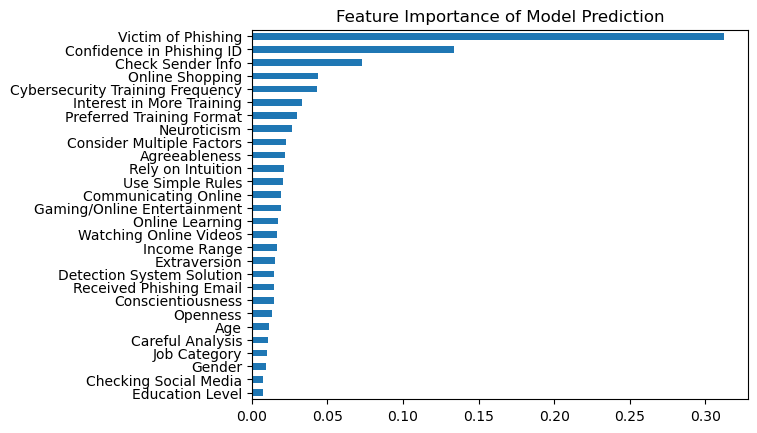

In [68]:
features_prediction.sort_values().plot.barh()
plt.title("Feature Importance of Model Prediction");